In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('flights.csv')
data = data.fillna(np.nan)

In [3]:
data.sample(n=5)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
179720,2015-01-07 00:00:00,EV,5362.0,SHV,ATL,-13.0,0.0,551.0,NaN,NaN,NaN,NaN,NaN,84.0
164297,2015-01-13 00:00:00,EV,4214.0,CLE,DCA,-13.0,0.0,310.0,NaN,NaN,NaN,NaN,NaN,77.0
72458,2015-01-05 00:00:00,WN,591.0,BWI,MSY,-14.0,0.0,998.0,NaN,NaN,NaN,NaN,NaN,167.0
1699,2015-01-02 00:00:00,AA,98.0,SFO,ORD,NaN,1.0,1846.0,NaN,NaN,NaN,NaN,NaN,NaN
169141,2015-01-05 00:00:00,EV,4604.0,IAH,RIC,-3.0,0.0,1157.0,NaN,NaN,NaN,NaN,NaN,147.0


In [4]:
data.sort_values(by='arr_delay', ascending=False)[:10]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,2015-01-11 00:00:00,AA,1595.0,AUS,DFW,1444.0,0.0,190.0,1444.0,0.0,0.0,0.0,0.0,59.0
10214,2015-01-13 00:00:00,AA,1487.0,OMA,DFW,1392.0,0.0,583.0,1392.0,0.0,0.0,0.0,0.0,117.0
12430,2015-01-03 00:00:00,AA,1677.0,MEM,DFW,1384.0,0.0,432.0,1380.0,0.0,0.0,4.0,0.0,104.0
8443,2015-01-04 00:00:00,AA,1279.0,OMA,DFW,1237.0,0.0,583.0,1222.0,0.0,15.0,0.0,0.0,102.0
10328,2015-01-05 00:00:00,AA,1495.0,EGE,DFW,1187.0,0.0,721.0,1019.0,0.0,168.0,0.0,0.0,127.0
36570,2015-01-04 00:00:00,DL,1435.0,MIA,MSP,1174.0,0.0,1501.0,1174.0,0.0,0.0,0.0,0.0,231.0
36495,2015-01-04 00:00:00,DL,1367.0,ROC,ATL,1138.0,0.0,749.0,1112.0,0.0,0.0,26.0,0.0,171.0
59072,2015-01-14 00:00:00,DL,1687.0,SAN,MSP,1084.0,0.0,1532.0,1070.0,0.0,0.0,14.0,0.0,240.0
32173,2015-01-05 00:00:00,AA,970.0,LAS,LAX,1042.0,0.0,236.0,1033.0,0.0,9.0,0.0,0.0,66.0
56488,2015-01-12 00:00:00,DL,2117.0,ATL,COS,1016.0,0.0,1184.0,1016.0,0.0,0.0,0.0,0.0,193.0


In [5]:
data['delayed'] = data['arr_delay'].apply(lambda x: x > 0)
data['delayed'].value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

In [6]:
not_delayed = data['delayed'].value_counts()[0] # first value of the result above
delayed = data['delayed'].value_counts()[1] # second value of the result above
total_flights = not_delayed + delayed # total count of flights
print(float(delayed) / total_flights) # converting to float to get a float result
    

0.48906597112


In [7]:
data['cancelled'].value_counts()

0.0    196873
1.0      4791
Name: cancelled, dtype: int64

In [10]:
not_cancelled, cancelled = data['cancelled'].value_counts()
print(cancelled / (cancelled + not_cancelled), '<- without conversion')
print(float(cancelled) / (cancelled + not_cancelled), '<- _with_ conversion!')
    

0.02375733894 <- without conversion
0.02375733894 <- _with_ conversion!


In [13]:
group_by_carrier = data.groupby(['unique_carrier','delayed'])
group_by_carrier

In [14]:
group_by_carrier.size()

unique_carrier  delayed
AA              False       8912
                True        9841
AS              False       3527
                True        2104
B6              False       4832
                True        4401
DL              False      17719
                True        9803
EV              False      10596
                True       11371
F9              False       1103
                True        1848
HA              False       1351
                True        1354
MQ              False       4692
                True        8060
NK              False       1550
                True        2133
OO              False       9977
                True       10804
UA              False       7885
                True        8624
US              False       7850
                True        6353
VX              False       1254
                True         781
WN              False      21789
                True       21150
dtype: int64

In [15]:
count_delays_by_carrier = group_by_carrier.size().unstack()
count_delays_by_carrier

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


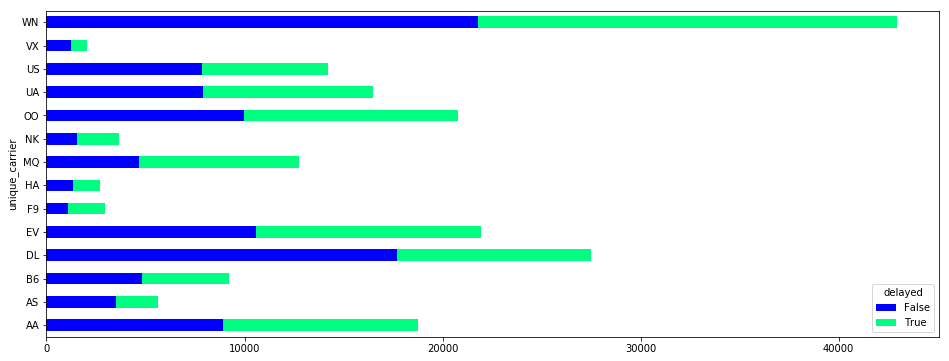

In [21]:
count_delays_by_carrier.plot(kind='barh', stacked=True, figsize=[16,6], colormap='winter')

In [22]:
data['delayed_20'] = data['arr_delay'].apply(lambda x: x > 20)
delay_counts = data['delayed_20'].value_counts()
delay_counts

False    152985
True      48679
Name: delayed_20, dtype: int64

In [24]:
print('Flights delayed longer than 20 min:', delay_counts[1]/float(delay_counts[1] + delay_counts[0]) * 100, '%')

Flights delayed longer than 20 min: 24.1386662964 %


In [25]:
flights_by_carrier = data.pivot_table(index='flight_date', columns='unique_carrier', values='flight_num', aggfunc='count')
flights_by_carrier.head()

unique_carrier,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
flight_date,,,,,,,,,,,,,,
2015-01-02 00:00:00,1545,477,759,2271,1824,254,224,1046,287,1763,1420,1177,176,3518
2015-01-03 00:00:00,1453,449,711,2031,1744,192,202,937,285,1681,1233,1028,160,3328
2015-01-04 00:00:00,1534,458,759,2258,1833,249,206,1027,284,1731,1283,1158,169,3403
2015-01-05 00:00:00,1532,433,754,2212,1811,264,209,1039,288,1737,1432,1157,174,3506
2015-01-06 00:00:00,1400,415,692,2054,1686,249,202,966,279,1527,1294,1003,152,3396


In [29]:
data.pivot_table(columns='flight_date')

flight_date,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,2015-01-11 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00
actual_elapsed_time,141.688442,145.950033,145.111664,140.607814,137.699987,136.297427,138.249851,137.045859,137.876833,138.712463,139.096045,134.649796,133.110117
arr_delay,9.838904,25.461860,31.975011,18.811310,21.299274,11.955429,13.316482,12.255611,1.922475,10.187042,18.563998,3.162599,-0.817102
cancelled,0.015352,0.021446,0.026480,0.026287,0.025792,0.019459,0.050784,0.029298,0.015392,0.023993,0.027442,0.012978,0.011469
carrier_delay,16.668783,18.023806,18.213584,17.986333,16.751224,15.317566,19.767890,18.768564,25.002997,17.142741,15.063235,18.112939,22.049189
delayed,0.500209,0.648050,0.679244,0.548707,0.544695,0.483912,0.419639,0.468328,0.345917,0.436424,0.551360,0.382279,0.302835
delayed_20,0.216116,0.375988,0.417564,0.284143,0.311851,0.230749,0.197889,0.220515,0.127592,0.204487,0.285436,0.138274,0.092461
distance,839.785915,848.749320,838.077666,820.224801,784.111329,785.939182,792.963770,793.554910,830.779650,809.407279,791.471614,779.262121,782.294072
flight_num,2284.698047,2287.225541,2268.050514,2233.375030,2238.016324,2237.701561,2238.148479,2237.685657,2484.358312,2271.538701,2246.031407,2249.280171,2241.273711
late_aircraft_delay,21.317207,26.525643,31.864547,26.294995,28.462557,22.112744,26.855823,26.280862,17.287712,26.642197,25.970956,19.288743,18.260073
nas_delay,9.005254,13.782660,15.452955,14.294107,17.223935,14.835132,18.485873,11.877020,6.972028,12.194943,16.471140,11.319079,9.395081


In [33]:
# just a try
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
flight_delays_by_day = data.pivot_table(index='flight_date', columns=['unique_carrier', 'origin'], values=delays_list, aggfunc='sum')
flight_delays_by_day

carrier_delay                                            \
unique_carrier                 AA                                             
origin                        ABQ    ATL     AUS    BDL    BHM   BNA    BOS   
flight_date                                                                   
2015-01-02 00:00:00           0.0    5.0    71.0    4.0    NaN   0.0    0.0   
2015-01-03 00:00:00           0.0   20.0    24.0    0.0    0.0  16.0    1.0   
2015-01-04 00:00:00           NaN  101.0   173.0    0.0   15.0  17.0  113.0   
2015-01-05 00:00:00           0.0    1.0    82.0  130.0   19.0  64.0  119.0   
2015-01-06 00:00:00           NaN    NaN     0.0    0.0    NaN   NaN  158.0   
2015-01-07 00:00:00         499.0   23.0    86.0    NaN    NaN  89.0   47.0   
2015-01-08 00:00:00           NaN   17.0    32.0    NaN    NaN  57.0   49.0   
2015-01-09 00:00:00          53.0    0.0    31.0    0.0    NaN   0.0   31.0   
2015-01-10 00:00:00           NaN  426.0     0.0    0.0    NaN  46.0    0.0   
2015-01-11 00:00:00           NaN   10.0  1466.0    0.0    0.0   0.0   75.0   
2015-01-12 00:00:00          50.0    8.0    13.0   60.0    NaN   0.0    5.0   
2015-01-13 00:00:00          35.0   22.0     NaN    NaN  164.0   0.0  263.0   
2015-01-14 00:00:00           0.0    0.0    41.0    NaN    NaN  90.0  276.0   

                                        ...  weather_delay                    \
unique_carrier                          ...             WN                     
origin                BWI    CLE    CLT ...            SFO    SJC  SJU   SLC   
flight_date                             ...                                    
2015-01-02 00:00:00  74.0   97.0    0.0 ...            0.0   23.0  0.0   0.0   
2015-01-03 00:00:00   2.0    0.0    1.0 ...            0.0    3.0  0.0   0.0   
2015-01-04 00:00:00  13.0  822.0    3.0 ...            0.0    0.0  0.0   0.0   
2015-01-05 00:00:00  77.0    6.0    0.0 ...            0.0    0.0  0.0  29.0   
2015-01-06 00:00:00   0.0    0.0    0.0 ...            0.0    0.0  0.0   0.0   
2015-01-07 00:00:00  28.0   64.0    0.0 ...            0.0   43.0  0.0  43.0   
2015-01-08 00:00:00   2.0   13.0  145.0 ...          137.0    0.0  0.0  91.0   
2015-01-09 00:00:00  14.0    NaN   27.0 ...            0.0    0.0  0.0   0.0   
2015-01-10 00:00:00   4.0    NaN    0.0 ...            0.0    0.0  0.0   0.0   
2015-01-11 00:00:00   0.0    NaN   21.0 ...            0.0  582.0  NaN   0.0   
2015-01-12 00:00:00  22.0    0.0   18.0 ...            0.0    0.0  0.0   0.0   
2015-01-13 00:00:00   NaN    0.0    0.0 ...            0.0    0.0  0.0   0.0   
2015-01-14 00:00:00   NaN    NaN    NaN ...            0.0    0.0  NaN   0.0   

                                                         
unique_carrier                                           
origin                 SMF   SNA    STL   TPA  TUL  TUS  
flight_date                                              
2015-01-02 00:00:00    0.0   0.0    0.0   0.0  0.0  0.0  
2015-01-03 00:00:00    0.0   0.0    0.0  16.0  0.0  0.0  
2015-01-04 00:00:00    0.0   0.0   21.0   0.0  0.0  0.0  
2015-01-05 00:00:00    0.0   0.0   23.0   0.0  0.0  0.0  
2015-01-06 00:00:00    0.0   0.0    0.0   0.0  0.0  0.0  
2015-01-07 00:00:00    0.0  46.0    0.0  53.0  0.0  0.0  
2015-01-08 00:00:00    0.0   0.0  128.0   0.0  0.0  0.0  
2015-01-09 00:00:00    0.0   0.0    0.0   0.0  0.0  0.0  
2015-01-10 00:00:00    0.0   0.0    0.0   0.0  0.0  0.0  
2015-01-11 00:00:00  165.0   0.0    0.0   0.0  0.0  0.0  
2015-01-12 00:00:00    7.0   0.0   38.0  64.0  0.0  0.0  
2015-01-13 00:00:00    0.0  34.0    0.0   0.0  0.0  0.0  
2015-01-14 00:00:00    0.0   0.0    0.0   0.0  0.0  0.0  

[13 rows x 5705 columns]

In [35]:
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
flight_delays_by_day = data.pivot_table(index='flight_date', values=delays_list, aggfunc='sum')
flight_delays_by_day

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02 00:00:00,76143.0,97377.0,41136.0,258.0,7357.0
2015-01-03 00:00:00,122652.0,180507.0,93791.0,950.0,14252.0
2015-01-04 00:00:00,142667.0,249595.0,121043.0,380.0,16784.0
2015-01-05 00:00:00,101335.0,148146.0,80533.0,197.0,20438.0
2015-01-06 00:00:00,92383.0,156971.0,94990.0,372.0,26299.0
2015-01-07 00:00:00,66708.0,96301.0,64607.0,165.0,17763.0
2015-01-08 00:00:00,74861.0,101703.0,70006.0,510.0,33015.0
2015-01-09 00:00:00,80123.0,112193.0,50703.0,182.0,15076.0
2015-01-10 00:00:00,50056.0,34610.0,13958.0,116.0,5683.0


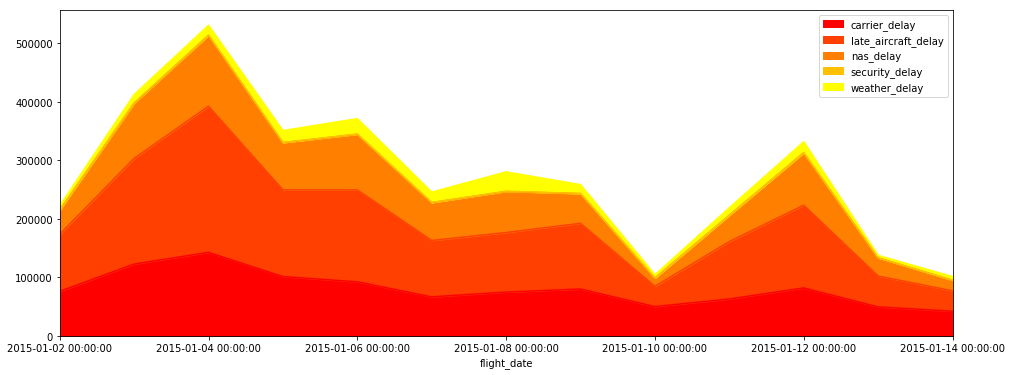

In [36]:
flight_delays_by_day.plot(kind='area', figsize=[16,6], stacked=True, colormap='autumn') # area plot

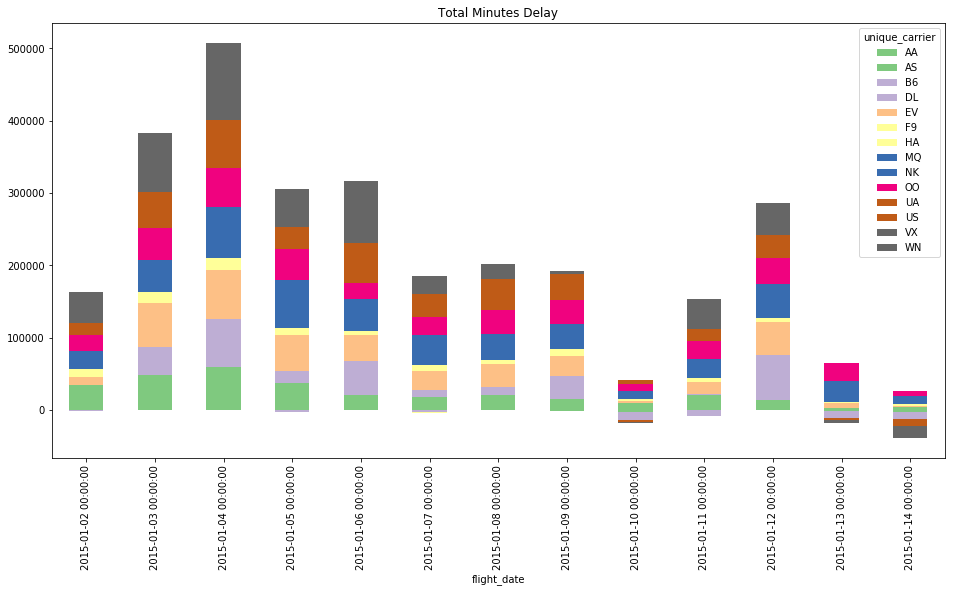

In [37]:
delay_by_day_carrier = data.pivot_table(index='flight_date', columns='unique_carrier', values='arr_delay', aggfunc='sum')
delay_by_day_carrier.plot(kind='bar', figsize=[16,8], stacked=True, colormap='Accent', title='Total Minutes Delay')